# Homework 1

#### Nawat Ngerncham

In [1]:
import numpy as np
import seaborn as sns
from typing import List

In [2]:
def get_distance(dist_data: np.array, city1: int, city2: int):
    return dist_data[city1, city2]


def compute_path_distance(dist_data: np.array, path: List[int]) -> float:
    path_to_use = path + [path[0]]
    return np.sum([get_distance(dist_data, x, y) for x, y in zip(path_to_use[:-1], path_to_use[1:])])


def generate_city_list(no_cities: int) -> List[int]:
    return [x for x in range(no_cities)]

## GR17

<Axes: xlabel='Iterations', ylabel='Distance'>

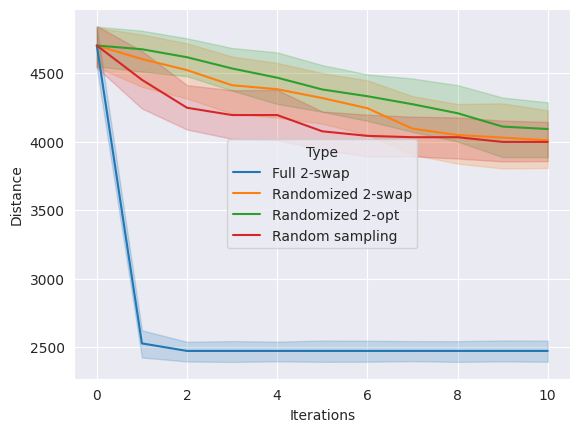

In [3]:
from experiment import run_experiment

result = run_experiment("data/gr17_d.txt")
sns.lineplot(result, x="Iterations", y="Distance", hue="Type")